**REGRESSÃO LOGÍSTICA**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("..\\datasets\\advertising.csv")

In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Count'>

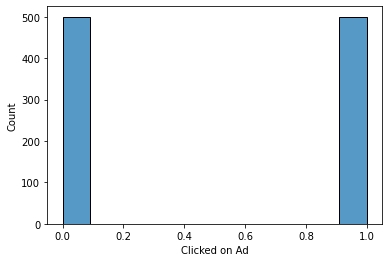

In [10]:
sns.histplot(df, x="Clicked on Ad")

In [13]:
# Número de pessoas que clicaram ou não clicaram
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [14]:
df["Clicked on Ad"].value_counts(normalize=True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

In [17]:
df_model = df.select_dtypes(include = np.number)

In [18]:
df_model

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [19]:
x = df_model.drop(columns="Clicked on Ad")
y = df_model["Clicked on Ad"]

In [20]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [23]:
# 1) Importar o estimador
from sklearn.linear_model import LogisticRegression

In [24]:
# 2) Instanciar o estimador (hiperparametros!)
# Modelo baseline escolhemos os hiperparametros default
lr = LogisticRegression()

In [29]:
# 3) train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
# 4) treino com .fit, dados de treino
lr.fit(x_train, y_train)

LogisticRegression()

MODELO TREINADO!!

In [32]:
lr.intercept_

array([0.00549774])

In [33]:
lr.coef_

array([[-5.61839608e-02,  2.65933604e-01, -1.62153396e-05,
        -2.74019904e-02,  2.26459439e-03]])

In [35]:
y_pred = lr.predict(x_test)

In [37]:
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [39]:
y_test[:10].values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

RESULTADO USANDO A PROBABILIDADE

In [44]:
lr_proba = lr.predict_proba(x_test)*100

In [45]:
lr_proba[:10]

array([[50.58997471, 49.41002529],
       [ 0.30197107, 99.69802893],
       [ 4.95289102, 95.04710898],
       [ 1.00266761, 98.99733239],
       [97.0050585 ,  2.9949415 ],
       [71.53512358, 28.46487642],
       [97.66498343,  2.33501657],
       [ 0.92128037, 99.07871963],
       [69.13994919, 30.86005081],
       [ 5.18626496, 94.81373504]])

In [47]:
y_proba_1 = lr_proba[:, 1]
y_proba_1

array([49.41002529, 99.69802893, 95.04710898, 98.99733239,  2.9949415 ,
       28.46487642,  2.33501657, 99.07871963, 30.86005081, 94.81373504,
        1.91973459, 90.90921247, 99.72759974,  2.42941879, 91.83723022,
       99.37097871, 99.88221381, 96.75141551,  9.27475849, 99.03039205,
        9.26845067, 98.67275287, 99.40917664,  1.50985558,  2.00769811,
       99.54274407,  0.86869382,  1.49337933, 99.08453777, 73.08672776,
        1.73430636, 66.91162618,  3.5847581 , 85.73595019, 99.78880028,
        7.09488697,  2.46164259, 11.13378215, 86.52381835, 97.95995885,
        1.43751539, 91.89211519,  2.39115237, 98.40065377,  1.24847499,
       10.08665685, 99.23479089, 99.84548612,  2.3674479 , 99.69297911,
       98.05286826,  0.83781385, 88.39461249,  1.23104561, 11.15746918,
        6.68504894, 13.62737796, 99.81228148,  2.49385435, 96.12083562,
        7.74709601, 99.11410561, 10.87286091, 97.16179222, 87.78192233,
       97.44674843, 99.85446743,  6.35051496, 70.50712703, 95.10

In [48]:
y_proba_0 = lr_proba[:, 0]
y_proba_0

array([5.05899747e+01, 3.01971071e-01, 4.95289102e+00, 1.00266761e+00,
       9.70050585e+01, 7.15351236e+01, 9.76649834e+01, 9.21280366e-01,
       6.91399492e+01, 5.18626496e+00, 9.80802654e+01, 9.09078753e+00,
       2.72400259e-01, 9.75705812e+01, 8.16276978e+00, 6.29021287e-01,
       1.17786190e-01, 3.24858449e+00, 9.07252415e+01, 9.69607953e-01,
       9.07315493e+01, 1.32724713e+00, 5.90823355e-01, 9.84901444e+01,
       9.79923019e+01, 4.57255934e-01, 9.91313062e+01, 9.85066207e+01,
       9.15462235e-01, 2.69132722e+01, 9.82656936e+01, 3.30883738e+01,
       9.64152419e+01, 1.42640498e+01, 2.11199720e-01, 9.29051130e+01,
       9.75383574e+01, 8.88662178e+01, 1.34761816e+01, 2.04004115e+00,
       9.85624846e+01, 8.10788481e+00, 9.76088476e+01, 1.59934623e+00,
       9.87515250e+01, 8.99133432e+01, 7.65209110e-01, 1.54513882e-01,
       9.76325521e+01, 3.07020894e-01, 1.94713174e+00, 9.91621862e+01,
       1.16053875e+01, 9.87689544e+01, 8.88425308e+01, 9.33149511e+01,
      